In [1]:
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import itertools
import pickle
from matplotlib import pyplot as plt
import datetime
from scipy import optimize
import sys
sys.path.append('../SEIR_full/')
sys.path.append('..')
import SEIR_full as mdl
%matplotlib inline

In [2]:
# plt.style.use('dean_style.conf')

# Examine

In [3]:
scen = 'Scenario1'
res = mdl.run_model(
    beta_home = 0.,
    beta_j=np.array([0.0]*9),
    eps=mdl.eps[scen],
    f=mdl.f0_full[scen],
    days_in_season=100, 
    alpha=1,
)

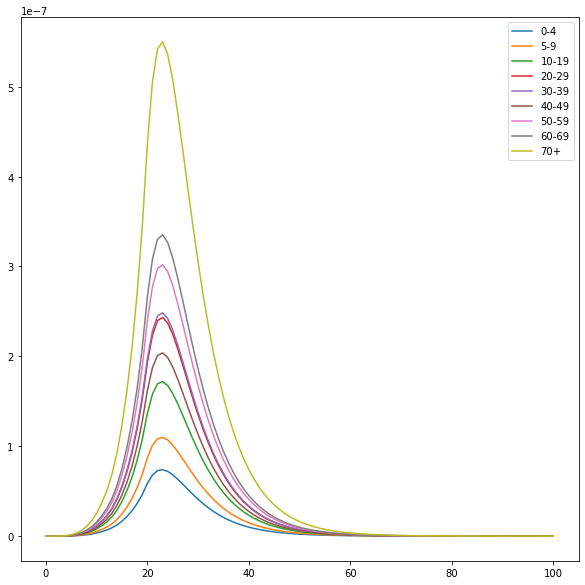

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x6a4a90b8>)

In [10]:
mdl.plot_I_by_age(res)

In [5]:
res['new_Is'].sum()

2.4527649508391286e-06

# Model calibration

In [11]:
# import data
data = pd.read_csv('../Data/raw/data_IL_age.csv')
data.head()

,date,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0,21-02-20,4.378280e-09,4.378280e-09,2.189140e-08,5.253940e-08,3.283710e-08,2.845880e-08,3.064800e-08,2.408060e-08,1.970230e-08
1,22-02-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,23-02-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,24-02-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,25-02-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [17]:
data = data[list(mdl.A.values())]

## Calibration with initial I distributed based on population

minimized value: -24.59506162664013
fitted parameters: Beta=[0.         0.0240858  0.08420538 0.10763493 0.25      ]
num of sampling the target function: 39


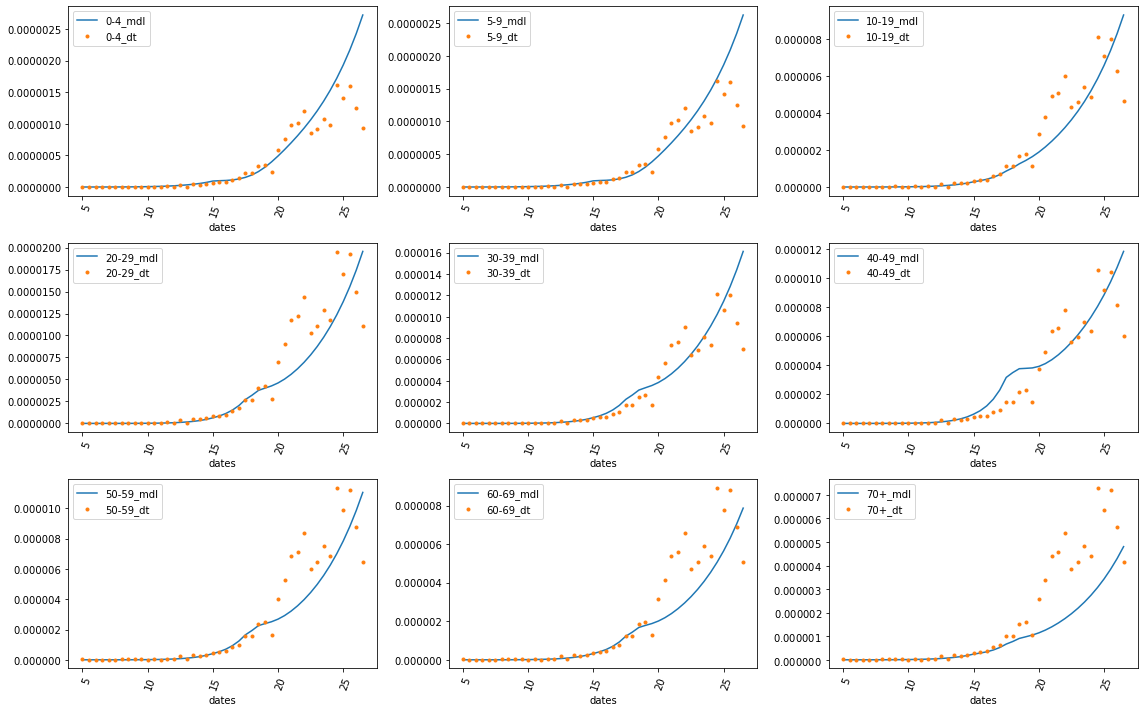

In [18]:
scen = 'Scenario3'
days_in_season=400
alpha=1

# Model Fitting
p0=(0.0568896,0.05063072,0.09070173,0.11419741,0.2) # initial guess
bnds = ((0,0.7),(0,0.7),(0,0.15),(0,0.22),(0,0.25))# boundries for variables
# errorfunc(tpl,data,f,season_length, eps, alpha)
res_fit= optimize.minimize(mdl.errorfunc,
                           p0,bounds=bnds,
                           method='TNC',
                           args=(data.values,
                                 mdl.f0_full[scen],
                                 days_in_season,
                                 mdl.eps[scen],alpha
                                ),
                           options={'maxiter':1000},
                          )

fitted_params = res_fit.x

# run the fitted model:
fitted_beta = np.array([fitted_params[0], fitted_params[0], fitted_params[1], fitted_params[2], fitted_params[2],\
                        fitted_params[3], fitted_params[3], fitted_params[4], fitted_params[4]])
# fitted_beta_home = fitted_params[5]
                        
res_mdl = mdl.run_model(
    beta_home=0.38/9.,
    beta_j=fitted_beta,
    eps=mdl.eps[scen],
    f=mdl.f0_full[scen],
    alpha=alpha,
    days_in_season=days_in_season
)

# plotting the data and model
mdl.print_stat_fit(res_fit)
mdl.plot_calibrated_model(
    data=data.values, 
    mdl_data = res_mdl['new_Is'],
    date_list = data.index.values, 
    season_length=days_in_season,
)